## Automobile EDA
The below is an EDA based upon the automobiles dataset. All in all a comprehensive look at an industry I find extremely interesting. I'm eager to know how different aspects of the vehicles effect performance and percentages of vehicle types etc. Let's dive in!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
from pandas.io.json import json_normalize  

from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
auto_df = pd.read_csv('automobile.txt', delim_whitespace=False)
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Missing values
The below reading cannot be taken for face value and still needs much correction.

In [3]:
missing_values_count = auto_df.isnull().sum()
missing_values_count

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Before I go deeper I always like to give a general description of the dataset.

In [4]:
print("There are {} observations and {} features in this dataset. \n".format(auto_df.shape[0],auto_df.shape[1]))

print("There are {} types of cars in this dataset such as {}... \n".format(len(auto_df.make.unique()),
                                                                           ", ".join(auto_df.make.unique()[0:5])))

print("There are {} forms of aspiration in this dataset such as {}. \n".format(len(auto_df.aspiration.unique()),
                                                                                      " and ".join(auto_df.aspiration.unique()[0:2])))

There are 205 observations and 26 features in this dataset. 

There are 22 types of cars in this dataset such as alfa-romero, audi, bmw, chevrolet, dodge... 

There are 2 forms of aspiration in this dataset such as std and turbo. 



So as we can see below certain values are not what they are supposed to be. This is when we need to get our hands dirty and handle the missing values and incorrect data types.

In [5]:
auto_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Setting the missing value to mean of normalized losses and convert the datatype to integer

In [6]:
nl = auto_df['normalized-losses'].loc[auto_df['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
auto_df['normalized-losses'] = auto_df['normalized-losses'].replace('?',nlmean).astype(int)
auto_df['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int64

We see below that 4 values in price are not numeric

In [7]:
auto_df['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

We call and recieve the location of the missing values

In [8]:
auto_df['price'].loc[auto_df['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

Setting the missing price to mean of price and convert the datatype to integer

In [9]:
price = auto_df['price'].loc[auto_df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
auto_df['price'] = auto_df['price'].replace('?',pmean).astype(int)
auto_df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

Checking the numeric and replacing with mean value and converting the datatype to integer

In [10]:
auto_df['horsepower'].str.isnumeric().value_counts()
horsepower = auto_df['horsepower'].loc[auto_df['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
auto_df['horsepower'] = auto_df['horsepower'].replace('?',pmean).astype(int)

Checking the outlier of horsepower

In [11]:
auto_df.loc[auto_df['horsepower'] > 10000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,122,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,13207,?,23,31,9295
131,2,122,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,13207,?,23,31,9895


Excluding the outlier data for horsepower

In [12]:
auto_df[np.abs(auto_df.horsepower-auto_df.horsepower.mean())<=(3*auto_df.horsepower.std())]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Removing rows that have missing values for 'num-of-doors'

In [13]:
auto_df['num-of-doors'].loc[auto_df['num-of-doors'] == '?']
auto_df = auto_df[auto_df['num-of-doors'] != '?']
auto_df['num-of-doors'].loc[auto_df['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

All the following values need to be turned into numeric values

In [14]:
auto_df['stroke'] = pd.to_numeric(auto_df['stroke'],errors='coerce')
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'],errors='coerce')
auto_df['price'] = pd.to_numeric(auto_df['price'],errors='coerce')
auto_df['bore'] = pd.to_numeric(auto_df['bore'],errors='coerce')
auto_df['peak-rpm'] = pd.to_numeric(auto_df['peak-rpm'],errors='coerce')
auto_df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

#### Data Cleaning Complete
Now we will be able to create some visualizations with matplotlib.

In [15]:
clean_auto_df = auto_df
clean_auto_df['peak-rpm'] = pd.to_numeric(clean_auto_df['peak-rpm'],errors='coerce')

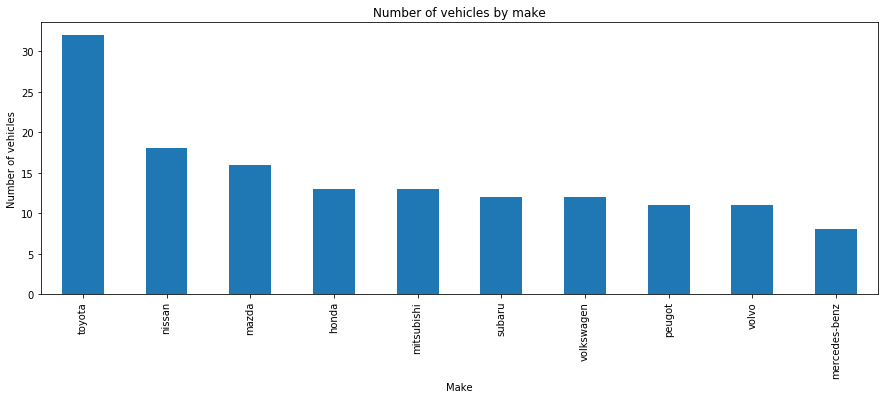

In [16]:
clean_auto_df.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

### Hypothesis on the above graph
Number of different vehicles produced by Toyota dwarfs all other competitors

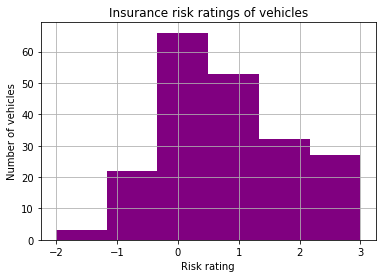

In [17]:
clean_auto_df.symboling.hist(bins=6,color='purple');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

### Hypothesis on the above graph
Most vehicles surprising enough carry no risk at all. I would expect more cars to be in the positive than just on zero.

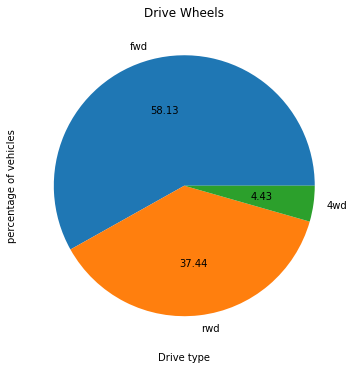

In [18]:
clean_auto_df['drive-wheels'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Drive Wheels")
plt.ylabel('percentage of vehicles')
plt.xlabel('Drive type');

### Hypothesis on the above graph
Front wheel drive is an obvious winner in this particular regard.

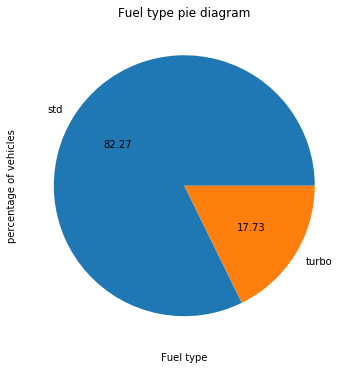

In [19]:
clean_auto_df['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('percentage of vehicles')
plt.xlabel('Fuel type');

### Hypothesis on the above graph
Naturally apirated vehicles still dominate today due to the slow adoption of turbos.

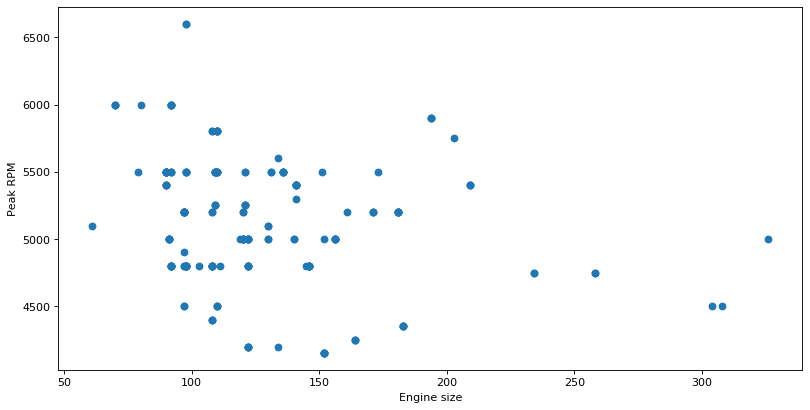

In [20]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(auto_df['engine-size'], clean_auto_df['peak-rpm'])
plt.xlabel('Engine size')
plt.ylabel('Peak RPM');

### Hypothesis on the above graph
A basic Scatter plot of Engine size and Peak RPM. Which show the bigger the engine the lower the peak RPM


In [21]:
group_by_Manufacturer = clean_auto_df.groupby(by=['make'])

car_data_avg = round(group_by_Manufacturer.mean(),0)
car_data_avg

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
make,,,,,,,,,,,,,,,,
alfa-romero,2.0,122.0,91.0,170.0,65.0,50.0,2640.0,137.0,3.0,3.0,9.0,125.0,5000.0,20.0,27.0,15498.0
audi,1.0,144.0,102.0,184.0,69.0,54.0,2801.0,131.0,3.0,3.0,8.0,121.0,5500.0,19.0,24.0,17195.0
bmw,0.0,156.0,103.0,184.0,66.0,55.0,2929.0,167.0,3.0,3.0,9.0,139.0,5069.0,19.0,25.0,26119.0
chevrolet,1.0,100.0,92.0,152.0,62.0,52.0,1757.0,80.0,3.0,3.0,10.0,63.0,5300.0,41.0,46.0,6007.0
dodge,1.0,132.0,95.0,161.0,64.0,52.0,2146.0,103.0,3.0,3.0,9.0,84.0,5375.0,28.0,35.0,7790.0
honda,1.0,103.0,94.0,161.0,64.0,53.0,2097.0,99.0,3.0,3.0,9.0,80.0,5754.0,30.0,35.0,8185.0
isuzu,1.0,122.0,95.0,164.0,64.0,52.0,2214.0,102.0,3.0,3.0,9.0,77.0,5150.0,31.0,36.0,11062.0
jaguar,0.0,130.0,109.0,197.0,70.0,51.0,4027.0,281.0,4.0,4.0,9.0,205.0,4833.0,14.0,18.0,34600.0
mazda,1.0,124.0,97.0,170.0,66.0,53.0,2289.0,102.0,3.0,3.0,10.0,87.0,5138.0,25.0,31.0,10644.0


### Grouping needed in the above dataset for below graphs


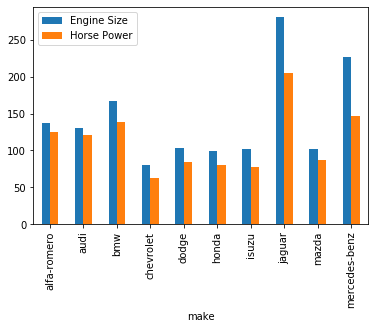

In [22]:
## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'Engine Size': car_data_avg['engine-size'],
                                     'Horse Power': car_data_avg['horsepower'],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10]
features_of_interest.plot(kind='bar')

### Hypothesis on the above graph
Data clearly states the bigger the engine, the more horsepower.

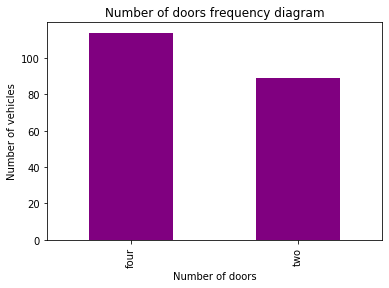

In [23]:
clean_auto_df['num-of-doors'].value_counts().plot(kind='bar',color='purple')
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');

### Hypothesis on the above graph
The four door cars have slightly more models made. Probably due to families and passenger vehicles.

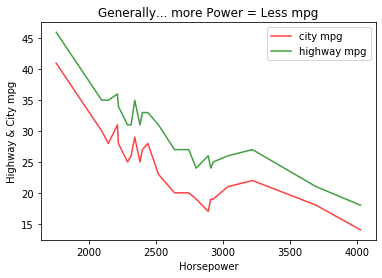

In [25]:
group_by_Manufacturer2 = clean_auto_df.groupby(by=['make'])

car_data_avg = round(group_by_Manufacturer2.mean(), 0)

df = car_data_avg.sort_values(by='curb-weight', ascending=False)
###############################################################################################################################

# Defining x axis values from data set
dev_x = df['curb-weight']

# Defining y axis values from data set
dev_y = df['city-mpg']

# Defining z axis values from data set
dev_z = df['highway-mpg']
###############################################################################################################################

# Plotting second dataset on graph
plt.plot(dev_x, dev_y, c='red', alpha=0.75, label="city mpg")

# Plotting first dataset on graph
plt.plot(dev_x, dev_z, c='green', alpha=0.75, label="highway mpg")

# Activating legend display on grapgh
plt.legend()

# Defining x axis label
plt.xlabel('Horsepower')

# Defining y axis label
plt.ylabel('Highway & City mpg')

# Defining graph title
plt.title('Generally... more weight = Less mpg')

# Displaying graph
plt.show()

### Hypothesis on the above graph
Cars that are heavier need more petrol to operate.